# 2.3 Complex Machine Learning Models and Keras Part 2

## Contents:

1. Import Libraries
2. Import Datasets
3. Data Wrangling
4. Reshaping the Model
5. Data Split
6. Random Forest Model
7. Features Importance

## 1. Import Libraries

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

## 2. Import Datasets

In [247]:
# Define path to dataset
path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/'

# Import dataset
df = pd.read_csv(os.path.join(path, 'Data Sets', 'df_cleaned_with_date.csv'))
df_pleasant = pd.read_csv(os.path.join(path, 'Data Sets', 'df_pleasant_with_date.csv'))

In [248]:
df.shape

(22950, 137)

In [249]:
df_pleasant.shape

(22950, 16)

## 3. Data Wrangling

In [251]:
# Reduce data to one decade (2010s)
df_2010s = df.loc[df['DATE'].astype(str).str[:3] == '201']
df_pleasant_2010s = df_pleasant.loc[df_pleasant['DATE'].astype(str).str[:3] == '201']

In [252]:
# Drop date unnecessary columns

df_2010s = df_2010s.drop(['DATE', 'MONTH'], axis=1)
df_pleasant_2010s = df_pleasant_2010s.drop(columns = 'DATE')

In [253]:
df_2010s.shape

(3652, 135)

In [254]:
df_pleasant_2010s.shape

(3652, 15)

## 4. Reshaping the Model

In [256]:
# Extract unique station names from column names
stations = [col.split('_')[0] for col in df_2010s.columns if '_' in col]

# Create a set of unique station names
unique_stations = set(stations)
unique_stations

# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df_2010s.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df_2010s[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Number of entries per station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Number of entries per station:
MAASTRICHT: 32868 entries
BELGRADE: 32868 entries
KASSEL: 32868 entries
SONNBLICK: 32868 entries
DEBILT: 32868 entries
DUSSELDORF: 32868 entries
MUNCHENB: 32868 entries
OSLO: 32868 entries
HEATHROW: 32868 entries
MADRID: 32868 entries
VALENTIA: 32868 entries
BUDAPEST: 32868 entries
LJUBLJANA: 32868 entries
STOCKHOLM: 32868 entries
BASEL: 32868 entries


In [257]:
X = df_2010s

In [258]:
y = df_pleasant_2010s

In [259]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [260]:
X.shape

(3652, 135)

In [261]:
y.shape

(3652, 15)

## 5. Data Split

In [263]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [264]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 6. Random Forest Model

In [266]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [267]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5761226725082147


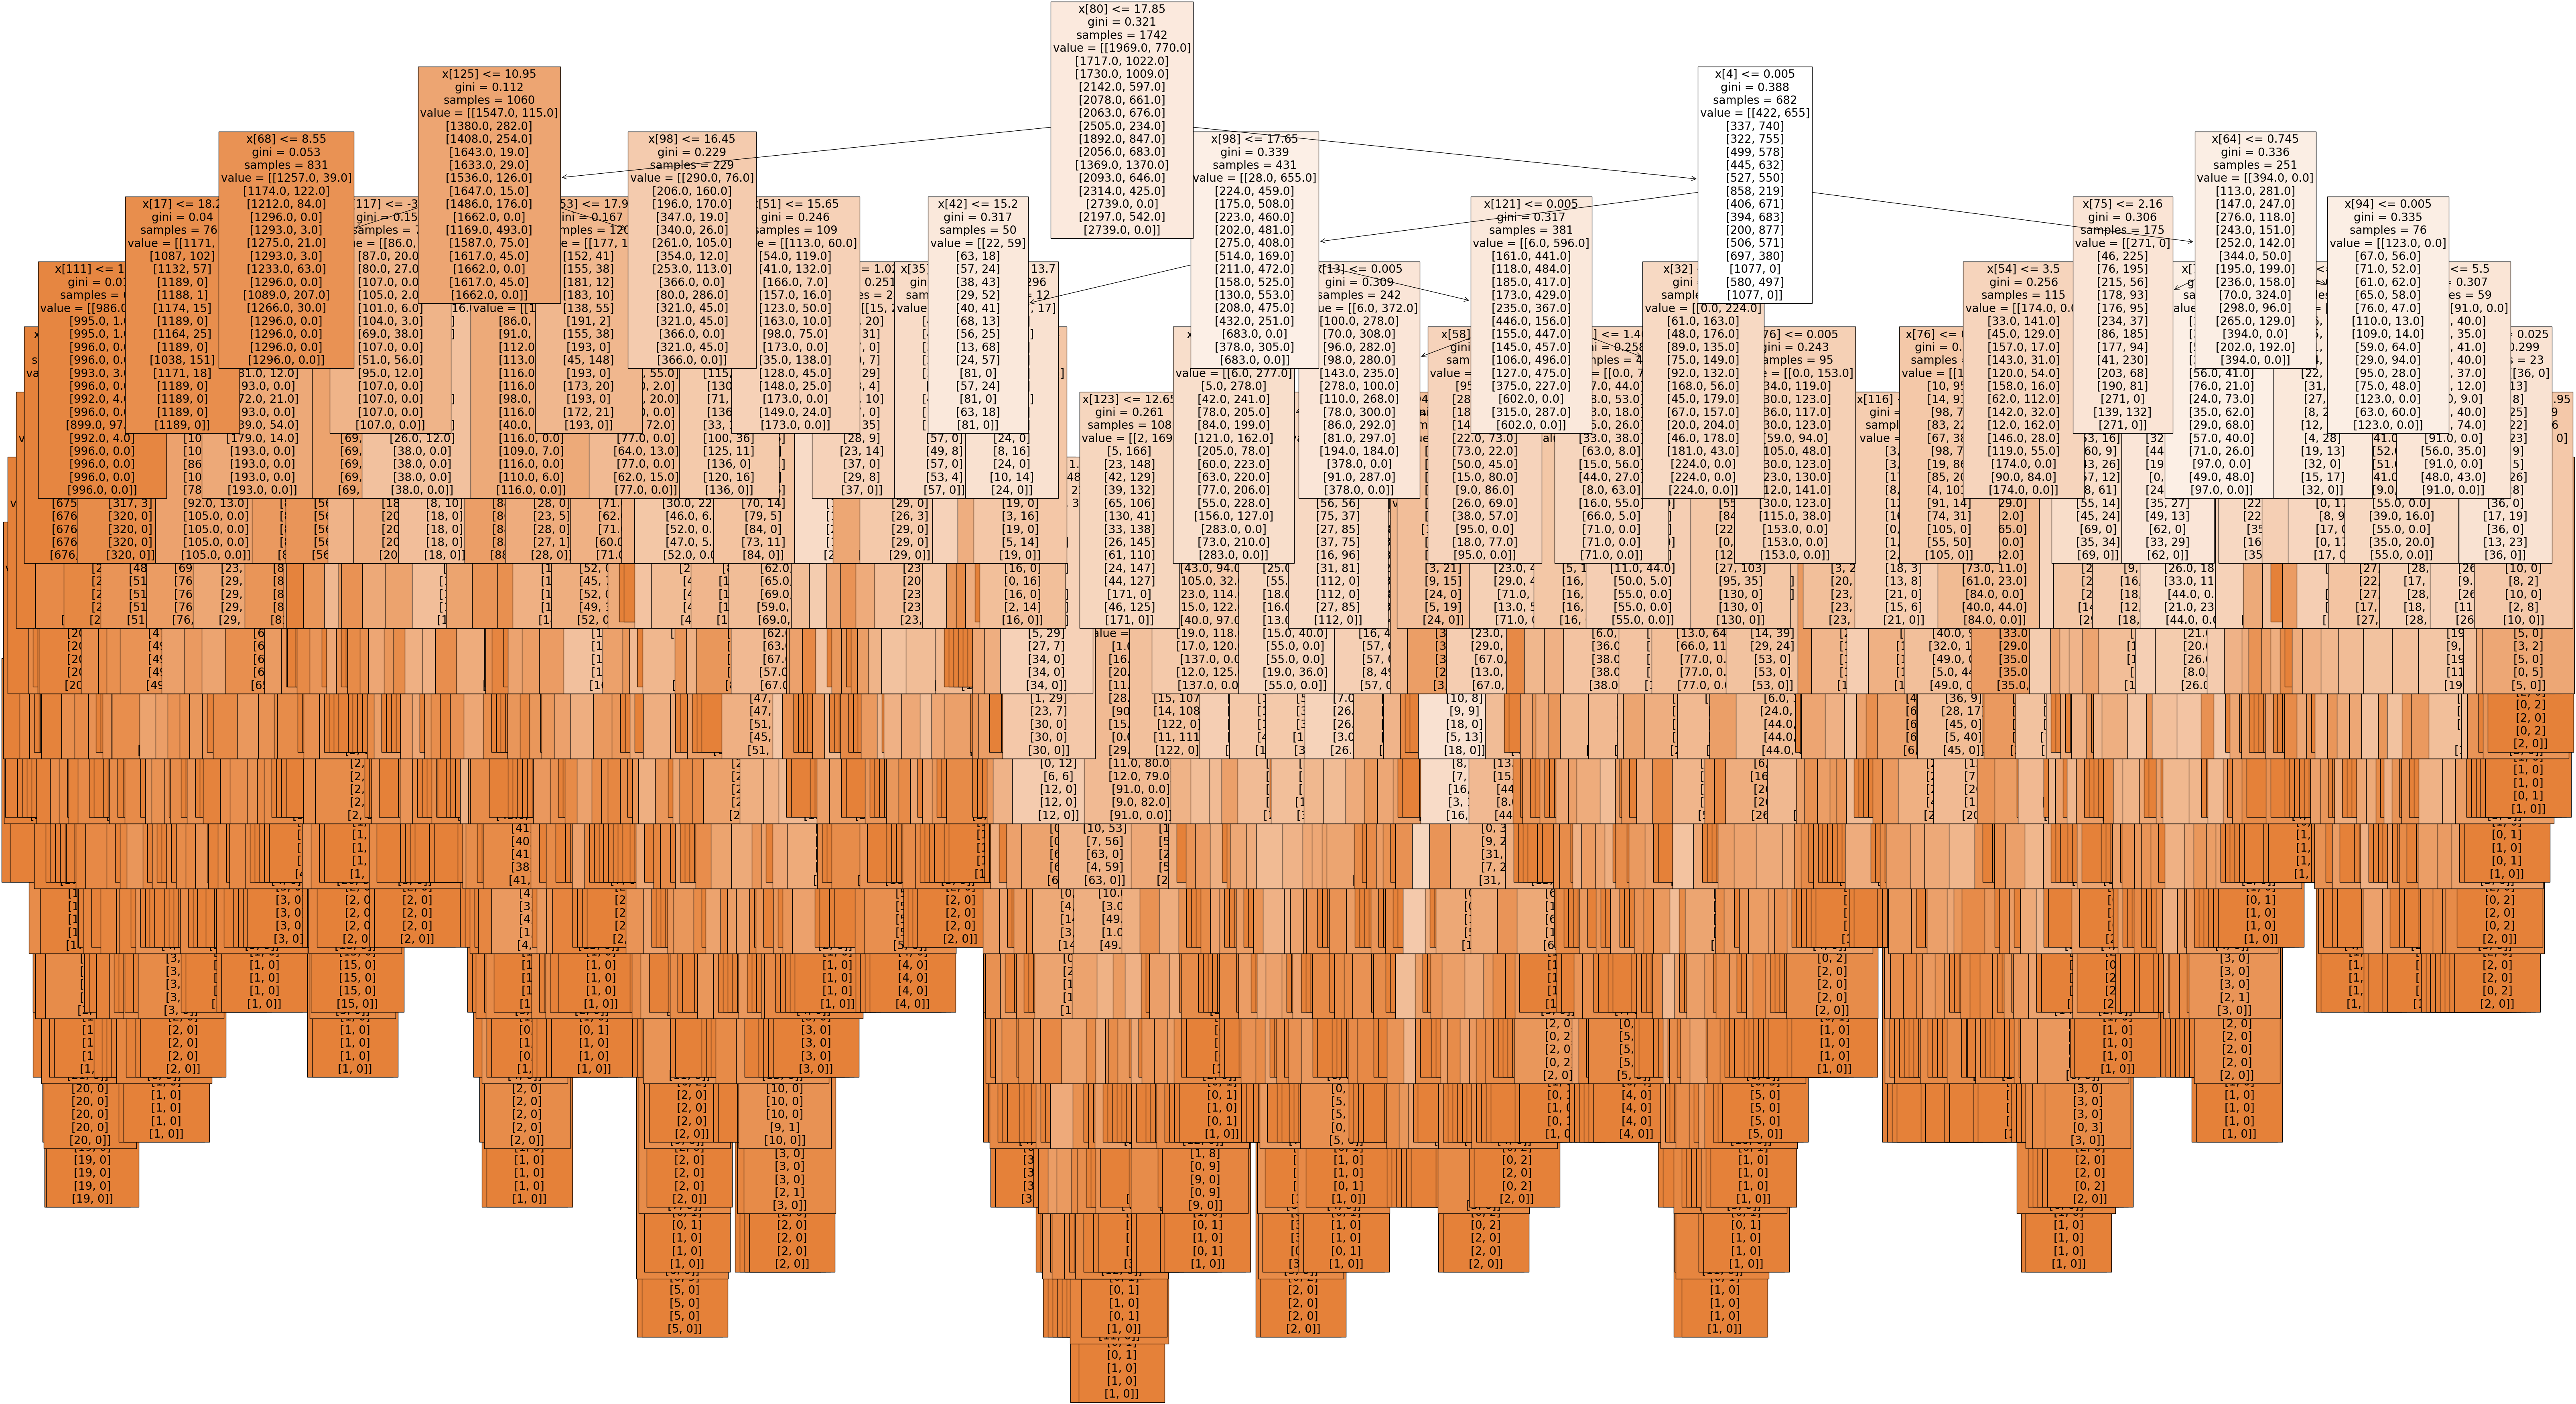

In [268]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [269]:
fig.savefig(os.path.join(path, 'Visualisations', 'random_forest_2010s.png'))

## 7. Features Importance

In [271]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([3.10151682e-03, 3.90514473e-03, 3.63515494e-03, 5.40667837e-03,
       1.87421782e-02, 1.12488653e-02, 2.18449976e-02, 1.06038474e-02,
       4.33687421e-02, 4.00835556e-03, 3.40628364e-03, 3.85095643e-03,
       3.21679717e-03, 1.55061806e-02, 4.37681760e-03, 5.02148586e-03,
       6.23579580e-03, 1.42872816e-02, 4.83769761e-04, 0.00000000e+00,
       0.00000000e+00, 1.58448936e-03, 1.50353853e-02, 1.37315199e-03,
       1.53012199e-02, 6.06430927e-03, 1.23041050e-02, 2.65367293e-03,
       2.82209813e-03, 4.64881414e-03, 4.23435605e-03, 1.67033698e-02,
       5.09657251e-03, 2.10410083e-02, 2.96206095e-03, 1.32267229e-02,
       2.75328240e-03, 3.68749893e-03, 5.37209841e-03, 3.92812692e-03,
       1.91524457e-02, 7.57879630e-03, 2.68340600e-02, 5.16134653e-03,
       4.06559170e-02, 2.44405101e-03, 4.36287308e-03, 3.85616008e-03,
       4.34815594e-03, 1.08925709e-02, 3.94005864e-03, 7.67035114e-03,
       3.01776905e-03, 1.23263318e-02, 3.82276681e-03, 2.29636132e-03,
      

In [272]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.10151682e-03, 3.90514473e-03, 3.63515494e-03, 5.40667837e-03,
         1.87421782e-02, 1.12488653e-02, 2.18449976e-02, 1.06038474e-02,
         4.33687421e-02],
        [4.00835556e-03, 3.40628364e-03, 3.85095643e-03, 3.21679717e-03,
         1.55061806e-02, 4.37681760e-03, 5.02148586e-03, 6.23579580e-03,
         1.42872816e-02],
        [4.83769761e-04, 0.00000000e+00, 0.00000000e+00, 1.58448936e-03,
         1.50353853e-02, 1.37315199e-03, 1.53012199e-02, 6.06430927e-03,
         1.23041050e-02],
        [2.65367293e-03, 2.82209813e-03, 4.64881414e-03, 4.23435605e-03,
         1.67033698e-02, 5.09657251e-03, 2.10410083e-02, 2.96206095e-03,
         1.32267229e-02],
        [2.75328240e-03, 3.68749893e-03, 5.37209841e-03, 3.92812692e-03,
         1.91524457e-02, 7.57879630e-03, 2.68340600e-02, 5.16134653e-03,
         4.06559170e-02],
        [2.44405101e-03, 4.36287308e-03, 3.85616008e-03, 4.34815594e-03,
         1.08925709e-02, 3.94005864e-03, 7.67035114e-03, 3.01776905

In [273]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12185713, 0.05990995, 0.05214643, 0.07338868, 0.11512357,
       0.05285832, 0.02983577, 0.07524771, 0.11761042, 0.06438757,
       0.08890503, 0.06409105, 0.03113151, 0.04914988, 0.00435699])

In [297]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [299]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MAASTRICHT    0.121857
HEATHROW      0.117610
DEBILT        0.115124
VALENTIA      0.088905
OSLO          0.075248
SONNBLICK     0.073389
MADRID        0.064388
BUDAPEST      0.064091
BELGRADE      0.059910
DUSSELDORF    0.052858
KASSEL        0.052146
STOCKHOLM     0.049150
LJUBLJANA     0.031132
MUNCHENB      0.029836
BASEL         0.004357
dtype: float64

In [301]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['MAASTRICHT', 'BELGRADE', 'KASSEL', 'SONNBLICK', 'DEBILT', 'DUSSELDORF', 'MUNCHENB', 'OSLO', 'HEATHROW', 'MADRID', 'VALENTIA', 'BUDAPEST', 'LJUBLJANA', 'STOCKHOLM', 'BASEL']


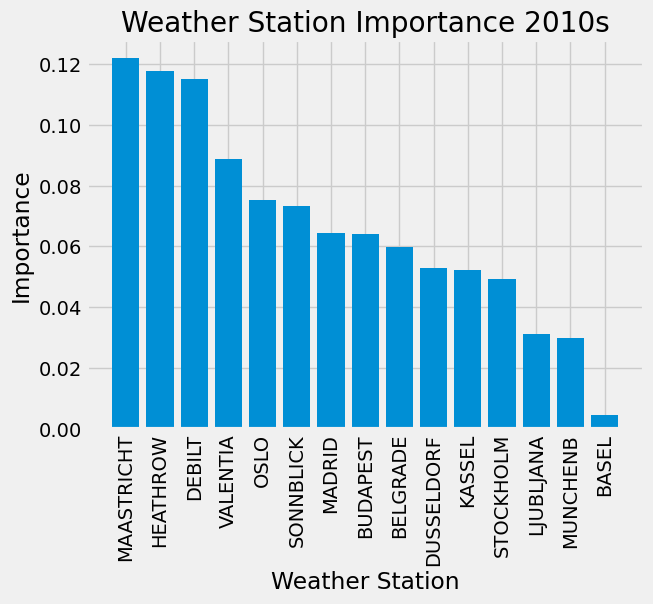

In [305]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, 'Visualisations', '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()